## CNN (Convolutional Neural Networks) Basics

Convolutional Neural Networks (CNNs) are designed to handle data that has a grid-like structure — like images. Instead of connecting every neuron to every pixel like an MLP, CNNs **look at small local regions** of the image and slide filters over it to detect patterns.

In [1]:
import random
import math
import matplotlib.pyplot as plt
# hahaha, no random.seed() this time :D

### Example Input: Grayscale Image

A small 5×5 grayscale image using nested lists. Each value is a pixel intensity from 0 to 1.

In [2]:
image = [
    [0.2, 0.3, 0.5, 0.3, 0.2],
    [0.1, 0.6, 0.8, 0.6, 0.1],
    [0.3, 0.9, 1.0, 0.9, 0.3],
    [0.1, 0.6, 0.8, 0.6, 0.1],
    [0.2, 0.3, 0.5, 0.3, 0.2],
]

In [3]:
# 3×3 filter (like edge detector)
kernel = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
]

In [4]:
def convolve2d(image, kernel):
    h, w = len(image), len(image[0])
    kh, kw = len(kernel), len(kernel[0])
    output = []

    for i in range(h - kh + 1):
        row = []
        for j in range(w - kw + 1):
            val = 0
            for ki in range(kh):
                for kj in range(kw):
                    val += image[i + ki][j + kj] * kernel[ki][kj]
            row.append(val)
        output.append(row)
    return output

convolved = convolve2d(image, kernel)

### ReLU Activation

We apply ReLU (Rectified Linear Unit) to introduce non-linearity. It just keeps positive values and zeroes out the rest.

In [5]:
def relu(feature_map):
    return [[max(0, val) for val in row] for row in feature_map]

activated = relu(convolved)

### Step 4 – Max Pooling

Max pooling downsamples the feature map by taking the maximum in each 2×2 region. It reduces size and keeps strong features.

In [6]:
def max_pooling(feature_map, size=2, stride=2):
    h, w = len(feature_map), len(feature_map[0])
    output = []
    for i in range(0, h - size + 1, stride):
        row = []
        for j in range(0, w - size + 1, stride):
            patch = [feature_map[i + m][j + n] for m in range(size) for n in range(size)]
            row.append(max(patch))
        output.append(row)
    return output

pooled = max_pooling(activated)

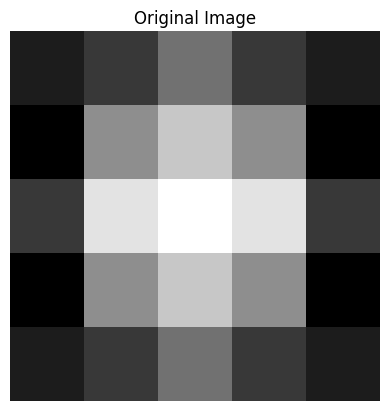

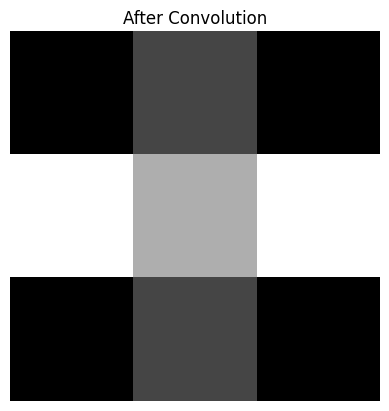

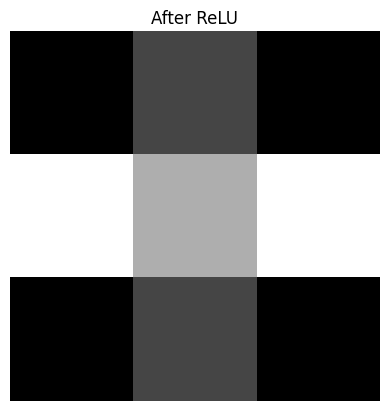

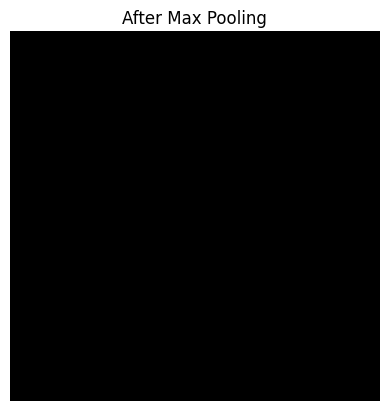

In [7]:
def plot_feature_map(data, title):
    plt.imshow(data, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_feature_map(image, "Original Image")
plot_feature_map(convolved, "After Convolution")
plot_feature_map(activated, "After ReLU")
plot_feature_map(pooled, "After Max Pooling")

## What We’ve Understood from CNN Basics

This notebook showed how CNNs process image data using a few core operations — each simple on its own but powerful together.

**Convolution** slides a small filter over the image and captures patterns — like edges or shapes. Instead of using fully connected neurons, it processes local regions.

**ReLU** makes the network non-linear by zeroing out negatives and keeping positives. This helps the model focus on strong signals.

**Max pooling** reduces the size of the image while keeping key features. This makes the model faster and more robust.

We saw how an image goes through each step and slowly transforms. This is just the start — real CNNs use many filters and layers — but now you know how the building blocks work.

By doing it all from scratch, you’ve peeled back the layers of abstraction and really seen the “mechanics” of CNNs in action.